In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 1st order ODE
## Air resistance for a freely falling body
$\dot{v}=\frac{mg-\frac{1}{2}\rho{}v^2AC_D}{m}$

Text(0, 0.5, 'v(t)')

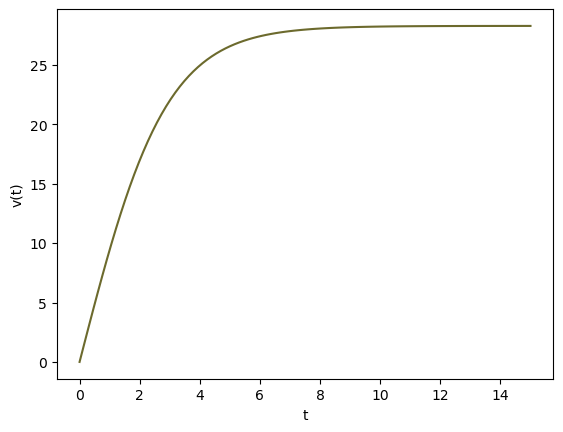

In [18]:
rho=1.225 #density of the fluid
A=1 #cross section area of the object 
Cd=1 #drag coefficient
m=50 #mass
g=9.8 

def dvdt(v,t,rho,A,Cd,m,g): #define the ODE
    return (m*g-0.5*rho*v**2*A*Cd)/m

v0=0 #set the initial condition

t=np.linspace(0,15,100) #points that we want ODE to be solved at

sol=odeint(dvdt,v0,t,args=(rho,A,Cd,m,g))


fig=plt.figure()
ax=fig.add_subplot(1,1,1)

ax.plot(t,sol,c="#6C6A2D")
ax.set_xlabel("t")
ax.set_ylabel("v(t)")

# Coupled 1st order ODE
$\dot{y_1}=y_1+y_2^2+3x$  
$\dot{y_2}=3y_1+y_2^3-\cos(x)$  
$ \vec{S} = \begin{bmatrix} y_1 \\ y_2 \end{bmatrix}$  
$\frac{d\vec{S}}{dx} = \begin{bmatrix}  y_1 + y_2^2 + 3x\\ 3y_1 + y_2^3 - \cos(x) \end{bmatrix}$


(100, 2)


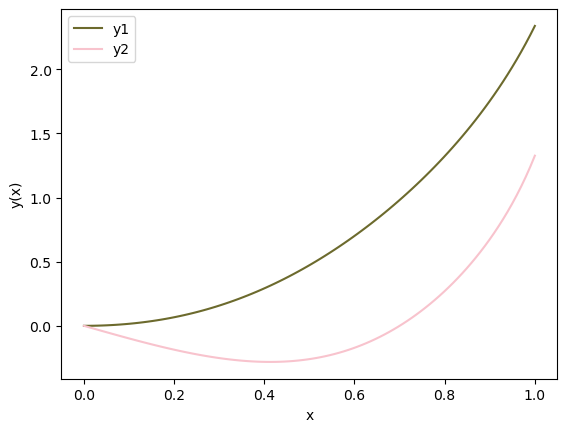

In [12]:
#Coupled 1st order ODE

def dsdx(S,x):  
    y1,y2=S
    return [y1 + y2**2  + 3*x,3*y1 + y2**3 - np.cos(x)]
y1_0=0
y2_0=0
S_0=(y1_0,y2_0)

x=np.linspace(0,1,100)

sol=odeint(dsdx,y0=S_0,t=x)

print(sol.shape)

sol_y1=sol.T[0]
sol_y2=sol.T[1]

fig=plt.figure()
ax=fig.add_subplot(1,1,1)

ax.plot(x,sol_y1,c="#6C6A2D",label="y1")
ax.plot(x,sol_y2,c="#F8C3CD",label="y2")
ax.set_xlabel("x")
ax.set_ylabel("y(x)")

plt.legend(loc="best")

# 2nd order ODE  
$\ddot{x}=-\dot{x}^2+\sin(x)$  
$\Downarrow$  
$\dot{x}=v$    
$\dot{v}=-v^2+\sin(x)$


C:\Users\User\anaconda3\lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


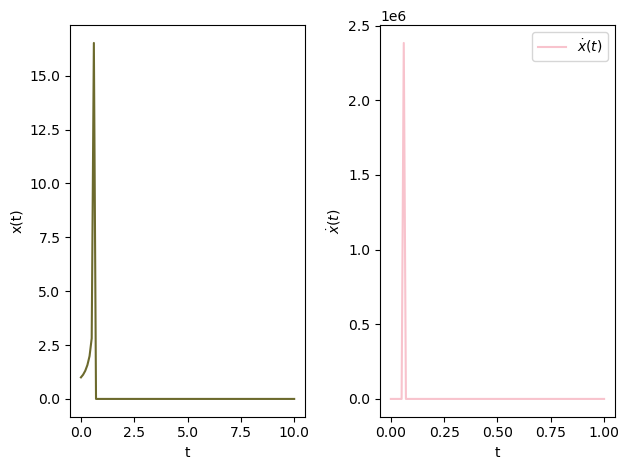

In [5]:
#2nd order ODE

def dsdt(S,t):
    x,v=S
    return[v,-(v**2)+np.sin(x)]

x_0=1
v_0=0
S_0=(x_0,v_0)

t=np.linspace(0,10,100)

sol=odeint(dsdx,y0=S_0,t=t)

sol_x=sol.T[0]
sol_v=sol.T[1]

fig=plt.figure()
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

ax1.plot(t,sol_x,c="#6C6A2D",label='x(t)')
ax2.plot(x,sol_v,c="#F8C3CD",label="$\dot{x}(t)$")
ax1.set_xlabel("t")
ax1.set_ylabel("x(t)")
ax2.set_xlabel("t")
ax2.set_ylabel("$\dot{x}(t)$")

plt.tight_layout()

plt.legend(loc="best")

# Application  
## Damped Oscillations  
$\ddot{x}+2\beta\dot{x}+\omega^2_0x=0$  
$\Downarrow$  
$\dot{x}=v$  
$\dot{v}=-2\beta{}v-\omega^2_0x$

Text(0, 0.5, 'x(t)')

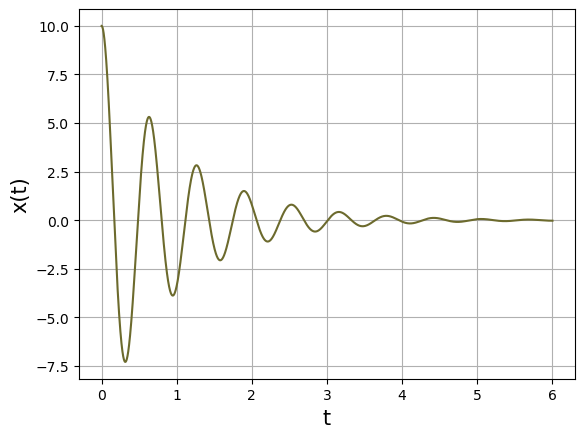

In [6]:
omega0=10
beta=1

omega=np.sqrt(omega0**2-beta**2)

def dsdt(S,t,omega0,beta):
    x,v=S
    return[v,-2*beta*v-omega0**2*x]

x_0=10
v_0=0
S_0=(x_0,v_0)

t=np.linspace(0,6,10000)

sol=odeint(dsdt,y0=S_0,t=t,args=(omega0,beta))

sol_x=sol.T[0]
sol_v=sol.T[1]

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(t,sol_x,c="#6C6A2D")
plt.grid()
ax.set_xlabel("t",fontsize=15)
ax.set_ylabel("x(t)",fontsize=15)

# Higher order ODE  
$\dddot{x}(t)=\ddot{x}-2a\dot{x}-t^2$  
$\Downarrow$  
$\dot{x}=v$  
$\dot{v}=u$  
$\dot{u}=u-2av-t^2$

Text(0, 0.5, 'u(t)')

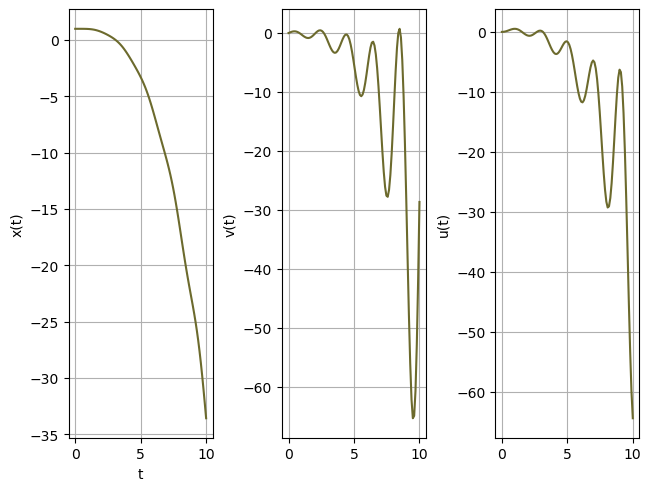

In [9]:
def dsdt(S,t,a):
    x,v,u=S
    return[v,u,u-2*a*v-t**2]

x_0=1
v_0=0
u_0=0
S_0=(x_0,v_0,u_0)

x_1=0
v_1=1
u_1=0
S_1=(x_1,v_1,u_1)

x_2=0
v_2=0
u_2=2
S_2=(x_2,v_2,u_2)

t=np.linspace(0,10,100)

a=5

sol1=odeint(dsdt,y0=S_0,t=t,args=(a,))
sol2=odeint(dsdt,y0=S_1,t=t,args=(a,))
sol3=odeint(dsdt,y0=S_2,t=t,args=(a,))

sol_x1=sol1.T[0]
sol_x2=sol2.T[0]
sol_x3=sol3.T[0]


fig,ax=plt.subplots(1,3,constrained_layout=True)

ax[0].plot(t,sol_x1,c="#6C6A2D")
ax[1].plot(t,sol_x2,c="#6C6A2D")
ax[2].plot(t,sol_x3,c="#6C6A2D")
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[0].set_xlabel("t")
ax[0].set_ylabel("x(t)")
ax[1].set_ylabel("v(t)")
ax[2].set_ylabel("u(t)")


